In [1]:
import numpy as np

### Extracting the text and filtering out bad characters

In [66]:
#install module to acquire text from PDF image files
#un comment the below command to install the pdfminer for the first time
#pip install pdfminer.six
from pdfminer.high_level import extract_text
import os
import pandas as pd

n=0
docs = []
for root, dirs, files in os.walk("/Users/mike/DSC478/Project/CIAUFOCD-FULL-CONVERTED"):
    for file in files:
        text = extract_text("/Users/mike/DSC478/Project/CIAUFOCD-FULL-CONVERTED/"+str(file))
        text = text.replace('\n','')
        bad_chars = [';', ':', '!', '*', '\n', '-', '.', '~','/',',']
        for i in bad_chars:
            text = text.replace(i,'')
            docs.append(text)
            n+=1

PDFSyntaxError: No /Root object! - Is this really a PDF?

The code block above utilized PDF miner to read through the PDF files in the local directory and extract the readable text from the documents. As the documents are very old and scanned without much care, the text extraction picks up on a lot of unreadable characters and adds its own when it misreads a character. In order to clean up the text extraction, the line breaks and "bad characters" were replaced with blanks to create a more readable string representation of each document. 

### Creating Doc x Term matrix using sklearn

In [67]:
#Sample of an extracted PDF
docs[1]

'C00212852 •. ,,.  Docurne1.t  48  of  2S  for  F3IS DOCN  000603236 F3IS  315  0175E?19 CL.~S  UNCLA5  3 I ..... SuoJ  aEL~\'US  Details  of  Inquiry  Into  Balloon  Downing  (Take  1  of  2) S~~I  ~SlSC9l33595 Minsk  ZVYAZD~ in  Bela~usian  15  Sep  95  pp  1,  3 \'iXT  (Report  by  Syarhey  Khrypach "The  Belarusians,  Swiss,  and  Poles ~re  \'3lamed\'  for  the  Death  of  U.S.  Balloonists.  w~ere  Is  the Truth?"  -- first  paragraph  published  in  boldface  passage  \'\'\'\'ithin slantlines  published  in  italic3] (F3IS  Translated  Text)  A  number  of  questions  and  stories immediately  surrounded  the  unique  tragedy  of  the  U.S.  balloon  which was  cowned  over  the  country\'s  territory.  So  what  actually  happened in  Bvarozawski  rayon,  Brest  Oblast?  Was  it  a  waft  of  a  new  "cold war,~  which  would  be  very  illogical  and  senseless  in  the  current oolitical  situation?  Or  was  it  absurdity  that  claimed  the  lives  of t.wo  people?  To  put

This is a sample of what one of the extracted PDF documents looks like once it is extracted and cleaned by the code snippet above.

### Creating the doc x term matrix using sklearn Count Vectorizer module

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

documents = docs
vec = CountVectorizer()
x = vec.fit_transform(documents)
dt = pd.DataFrame(x.toarray(), columns = vec.get_feature_names())
dt

,00,000,0000,000056961,00015,0002,0005,000502337,000526282,000528415,...,ztrs,zunilda,zvezda,zvolen,zvyazd,zvyazda,zwda,zyh,zyn,zyuw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
666,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
667,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see above, we start with 18,123 terms and there are still terms captured that don't mean anything. To further clean and reduce our term features, we'll start by removing terms that begin with zero so that we don't lose any dates but have no need for string representations of integers.

#### Removing terms that begin with 0

In [91]:
for name in dt.columns:
    if name.startswith('0'):
        del dt[name]

In [92]:
dt

,10,100,1000,1000000,1002,1005,100800,100939z,100japanese,100mlong,...,ztrs,zunilda,zvezda,zvolen,zvyazd,zvyazda,zwda,zyh,zyn,zyuw
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,6,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
666,6,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
667,6,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,6,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We are still left with 17,850 terms that don't add much value to our analysis such as terms that aren't real words. To try and cut down on these, we'll remove the term features with terms that begin with the same letter and see how much further we can reduce our feature set.

#### Removing terms that begin with the same letter

In [101]:
for item in dt.columns:
    for letter in item:
        try:
            if item.startswith(letter[0]+letter[0]):
                del dt[item]
        except:
            pass

In [102]:
dt

,10,100,1002,1005,100800,100939z,100japanese,100mlong,101,1010,...,ztrs,zunilda,zvezda,zvolen,zvyazd,zvyazda,zwda,zyh,zyn,zyuw
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,6,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
666,6,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
667,6,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
668,6,3,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


We were only able to reduce our term feature set by ~ 300 terms. In order to filter out a vast majority of the noise here, we'll turn to utilize the Pyenchant python package which includes a spellchecking library using the English dictionary that we can leverage to check for "real english words" in our term feature set.

#### Removing any remaining terms from doc x term matrix that are not in english dictionary

In [107]:
import enchant
d = enchant.Dict("en_US")
for item in dt.columns:
    if d.check(item) == False:
        del dt[item]

### Doc x Term Matrix

In [108]:
dt

,ab,abandon,abandonment,abide,ability,able,abnormal,abnormality,aboard,about,...,youths,yuan,zero,zigzag,zigzags,zine,zodiac,zone,zones,zoomed
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0,0,0,1,1,0,0,2,1,5,...,0,2,0,0,0,1,0,2,0,0
666,0,0,0,1,1,0,0,2,1,5,...,0,2,0,0,0,1,0,2,0,0
667,0,0,0,1,1,0,0,2,1,5,...,0,2,0,0,0,1,0,2,0,0
668,0,0,0,1,1,0,0,2,1,5,...,0,2,0,0,0,1,0,2,0,0


We were able to reduce our term features by about 10,000 and as you can see in the output above, the terms are much more interpretable. The further reduction of our dataset should help combat high assumed high variance in our dataset which should help to prevent some overfitting in our models.

In [4]:
#checking that all PDFs were loaded
len(docs)

670

Due to the RAM limitations of our machines, we had to reduce the amount of documents in our total dataset from 2,780 documents to 670 documents in order to successfully and efficiently cluster and classify the documents.

In [109]:
#Number of docs
numDocs = dt.shape[0]
#Number of terms
numTerms = dt.shape[1]

In [110]:
print(numTerms)
print(numDocs)

7681
670


Our full dataset consists of 7,681 terms and 670 documents.

### Transform dataframe to TFxIDF weights

In [111]:
#Term frequency per document
td = dt.T
DocFreq = pd.DataFrame([(td!=0).sum(1)]).T
DocFreq

,0
ab,40
abandon,20
abandonment,10
abide,20
ability,40
...,...
zine,10
zodiac,10
zone,80
zones,50


In [255]:
DocFreq.sort_values(by = 0, ascending=False)

,0
for,670
is,670
here,670
of,670
vault,670
...,...
vale,1
spreads,1
soc,1
pied,1


Sorting our document frequency dataframe shows us our 5 most common words and 5 least common words.

In [112]:
# Creating a matrix with all entries = numDocs
NMatrix=np.ones(np.shape(td), dtype=float)*numDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[670. 670. 670. ... 670. 670. 670.]
 [670. 670. 670. ... 670. 670. 670.]
 [670. 670. 670. ... 670. 670. 670.]
 ...
 [670. 670. 670. ... 670. 670. 670.]
 [670. 670. 670. ... 670. 670. 670.]
 [670. 670. 670. ... 670. 670. 670.]]


In [113]:
# Convert each entry into IDF values
IDF = np.log2(np.divide(NMatrix, np.array(DocFreq)))

In [114]:
np.set_printoptions(precision=2,suppress=True)
print(IDF)

[[4.07 4.07 4.07 ... 4.07 4.07 4.07]
 [5.07 5.07 5.07 ... 5.07 5.07 5.07]
 [6.07 6.07 6.07 ... 6.07 6.07 6.07]
 ...
 [3.07 3.07 3.07 ... 3.07 3.07 3.07]
 [3.74 3.74 3.74 ... 3.74 3.74 3.74]
 [6.07 6.07 6.07 ... 6.07 6.07 6.07]]


In [115]:
# Computing the TFxIDF values for each document-term entry
TD_tfidf = td * IDF

In [116]:
#Viewing our TFxIDF matrix
pd.set_option("display.precision", 2)

TD_tfidf

,0,1,2,3,4,5,6,7,8,9,...,660,661,662,663,664,665,666,667,668,669
ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
abandon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
abandonment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
abide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.07,5.07,5.07,5.07,5.07,5.07,5.07,5.07,5.07,5.07
ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.07,4.07,4.07,4.07,4.07,4.07,4.07,4.07,4.07,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07
zodiac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13
zones,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [117]:
#Creating a list of our terms
index = TD_tfidf.index
lst = list(index)

In [118]:
#DocxTerm TFxIDF matrix
DT_tfidf = TD_tfidf.T
DT_tfidf.shape

(670, 7681)

### Kmeans Clustering using tfidf matrix

In [237]:
#Importing the KMeans module from sklearn to run our clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=300, verbose=1) # initialization

A cluste size of 5 was chosen as we initially went with 10 clusters that did not offer much interpritablity. As such, we reduced to 5 clusters to increase the explainability of each cluster which you will see below.

In [238]:
kmeans.fit(DT_tfidf)

Initialization complete
Iteration 0, inertia 13070794.22854234
Iteration 1, inertia 9421065.155108294
Converged at iteration 1: center shift 5.3349907502606286e-30 within tolerance 0.0008787695500794594
Initialization complete
Iteration 0, inertia 12805960.841626294
Iteration 1, inertia 10172987.81168238
Converged at iteration 1: center shift 7.79036811394908e-30 within tolerance 0.0008787695500794594
Initialization complete
Iteration 0, inertia 10919473.926181126
Iteration 1, inertia 8557072.08531276
Converged at iteration 1: center shift 0.0 within tolerance 0.0008787695500794594
Initialization complete
Iteration 0, inertia 13707722.61211586
Iteration 1, inertia 9251280.44040544
Iteration 2, inertia 7869692.170882032
Converged at iteration 2: center shift 0.0 within tolerance 0.0008787695500794594
Initialization complete
Iteration 0, inertia 22896793.66116882
Iteration 1, inertia 10689570.765858056
Converged at iteration 1: center shift 1.2329414377721143e-28 within tolerance 0.00087

KMeans(n_clusters=5, verbose=1)

In [239]:
clusters = kmeans.predict(DT_tfidf)

In [240]:
labels = pd.DataFrame(clusters, columns=["Cluster"])
labels

,Cluster
0,4
1,4
2,4
3,4
4,4
...,...
665,1
666,1
667,1
668,1


A quick view of the document clustering is shown above. For example, the first 5 documents were clustered into Cluster 4 while the last 5 documents were clustered into Cluster 1.

In [241]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = lst)

In [242]:
centroids.head(10)

,ab,abandon,abandonment,abide,ability,able,abnormal,abnormality,aboard,about,...,youths,yuan,zero,zigzag,zigzags,zine,zodiac,zone,zones,zoomed
0,-5.55e-17,2.53e+00,0.00e+00,-2.78e-17,4.07e+00,8.70,0.00e+00,-5.55e-17,0.00,18.90,...,0.00e+00,-5.55e-17,-5.55e-17,0.00e+00,-1.39e-17,0.00e+00,0.00e+00,1.53e+00,0.00,0.00e+00
1,1.11e-16,-8.33e-17,-4.16e-17,2.53e+00,2.03e+00,0.00,-4.16e-17,1.01e+01,2.03,6.64,...,-4.16e-17,8.96e+00,1.95e+00,-4.16e-17,6.94e-18,3.03e+00,-4.16e-17,4.60e+00,3.74,3.03e+00
2,-5.55e-17,-2.78e-17,0.00e+00,-2.78e-17,-2.78e-17,6.96,0.00e+00,-5.55e-17,8.13,44.44,...,0.00e+00,-5.55e-17,1.95e+00,0.00e+00,-1.39e-17,0.00e+00,0.00e+00,-1.11e-16,3.74,0.00e+00
3,-5.55e-17,5.07e+00,6.07e+00,5.07e+00,-2.78e-17,3.48,6.07e+00,-5.55e-17,0.00,25.03,...,0.00e+00,-5.55e-17,3.90e+00,0.00e+00,-1.39e-17,0.00e+00,0.00e+00,3.07e+00,3.74,0.00e+00
4,4.00e-01,1.94e-16,-2.64e-16,1.94e-16,6.67e-02,0.11,-2.64e-16,3.89e-16,0.13,0.84,...,9.94e-02,7.35e-02,1.28e-01,9.94e-02,5.79e-02,-2.64e-16,9.94e-02,2.01e-01,0.12,-2.64e-16


#### Converting cluster center distances to absolute values so we can see which terms have the smallest distance to each cluster center

In [ ]:
centroidAbs = centroids.abs()

In [269]:
centroidAbs.sort_values(by = 4, axis=1, ascending=False)

,film,min,preview,cartoon,checking,video,dc,adverts,feature,soap,...,directly,feel,condition,require,package,research,spoken,promoting,ethical,participate
0,8.88e-16,0.00,0.00e+00,8.88e-16,8.88e-16,0.00,0.00e+00,0.00e+00,4.12e+00,4.44e-16,...,2.24,8.13,2.03,2.03,0.00,0.0,2.24,2.24,6.72,2.24
1,2.66e-15,3.76,1.78e-15,8.88e-16,1.53e+00,0.00,8.88e-16,1.33e-15,1.33e-15,1.33e-15,...,0.00,2.03,6.10,2.03,4.07,0.0,0.00,6.72,0.00,4.48
2,8.88e-16,0.00,0.00e+00,8.88e-16,8.88e-16,0.00,0.00e+00,0.00e+00,8.88e-16,4.44e-16,...,8.96,16.26,0.00,8.13,8.13,0.0,4.48,0.00,0.00,4.48
3,2.74e+00,0.00,0.00e+00,8.88e-16,8.88e-16,0.00,0.00e+00,0.00e+00,8.88e-16,4.44e-16,...,4.48,4.07,4.07,4.07,4.07,0.0,8.96,0.00,4.48,0.00
4,8.41e+00,7.34,5.45e+00,4.91e+00,4.88e+00,4.63,3.28e+00,3.16e+00,3.06e+00,2.37e+00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00


We can sort our clusters here by smallest centroid distances to each term to try and interpet the terms that are most closely related to each cluster. Cluster 2 is shown above and seems to include documents that reference words that begin with "gu". We can also see that the terms with the farthest distance from this cluster center are all terms with a scientific subject (science, academy, space, mars) perhaps suggesting that a large majority of the CIA documents on UFOs are related to scientific information.

In [244]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(DT_tfidf[clusters == c])
    return size

In [245]:
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  20
Size of Cluster 1 =  20
Size of Cluster 2 =  10
Size of Cluster 3 =  10
Size of Cluster 4 =  610


We can use the function "cluster_sizes()" above to view how many documents were clustered into each cluster. As referenced earlier, 10 clusters showed a similar trend of the majority (92%) of our documents were clustered into Cluster 4.

### Silhouette Values

In [246]:
from sklearn import metrics
silhouettes = metrics.silhouette_samples(DT_tfidf, clusters)
print(silhouettes[:20])

[0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.83]


In [247]:
print (silhouettes.mean())

0.7805292712771592


Silhouette value ranges from -1 to 1. An average value of .78 means our documents are actually pretty well matched to their own clusters and separated from other clusters even though the majority of the documents were put into one cluster (cluster 3)

In [209]:
import pylab as pl
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

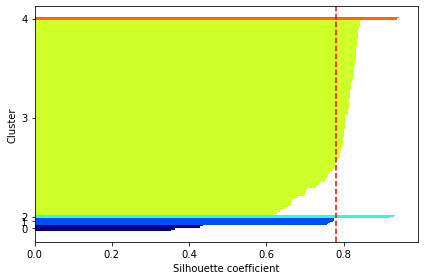

In [210]:
plot_silhouettes(DT_tfidf, clusters)

We can use the function above to view the silhouette values of each cluster. Cluster 0 has the value closest to zero (documents not as well matched to one another) while the other four clusters all have silhouette values around the average of .78 suggesting the documents in these clusters are well matched.

### Classification (KNN) using Clusters of tfidf matrix

We'll first build a classifier model using the TFxIDF matrix and compare this to classifying on the PCA matrix.

In [191]:
#Creating training and testing data (20/80 split)
from sklearn import neighbors
from sklearn.model_selection import train_test_split

train, test, target_train, target_test = train_test_split(DT_tfidf, labels, test_size=.2, random_state=5)
print(test.shape)

(134, 7681)


In [192]:
#Using sklearn neighbors module to classify.
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')
knnclf.fit(train, target_train)

<ipython-input-192-2413ef3590fb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnclf.fit(train, target_train)


KNeighborsClassifier(weights='distance')

#### Predicting on Test Data

In [193]:
knnpreds_test = knnclf.predict(test)

In [194]:
print(knnpreds_test)

[3 3 3 3 3 3 3 2 3 3 3 3 1 3 3 3 3 0 3 1 3 3 3 3 3 3 3 3 3 3 0 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


#### Measuring Accuracy of Clustering

In [195]:
from sklearn.metrics import classification_report

print(classification_report(target_test, knnpreds_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00       123
           4       1.00      1.00      1.00         3

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



In [196]:
print(knnclf.score(test, target_test))

1.0


In [197]:
print(knnclf.score(train, target_train))

1.0


We don't like seeing a perfect accuracy score from our Classification. This is most likely due to our model being highly overfit due to the amount of noise in our dataset from filler and stop words that are affecting the cluster labels. The classifier is being biased by the same things that the clustering was influenced by it seems like. We need to further reduce the term feature space to combat this.

### PCA

As our term feature space is so large and filled with noise, we will attempt to reduce this dimension by computing principal components on the dataset. We'll cluster on this reduced dimensional space and then build a classification model to predict the cluster labels we find.

In [225]:
#Using sklearn decomposition to compute principal components.
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
DTtrans = pca.fit(DT_tfidf).transform(DT_tfidf)

In [226]:
print(pca.explained_variance_ratio_)

[0.46 0.23 0.08 0.05 0.04 0.03 0.02 0.01 0.01 0.  ]


4 PCs explain 83% of the variance in our data.

### Clustering with PCA Matrix

In [213]:
kmeans = KMeans(n_clusters=5, max_iter=300, verbose=1) # initialization
kmeans.fit(DTtrans)

Initialization complete
Iteration 0, inertia 7400851.993761677
Iteration 1, inertia 6391620.880684082
Converged at iteration 1: center shift 0.0 within tolerance 0.6297645087618506
Initialization complete
Iteration 0, inertia 9457704.875654439
Iteration 1, inertia 7773845.288749577
Iteration 2, inertia 7661697.282485368
Converged at iteration 2: center shift 0.0 within tolerance 0.6297645087618506
Initialization complete
Iteration 0, inertia 6497976.103219052
Iteration 1, inertia 5527656.883070339
Converged at iteration 1: center shift 8.08120204664884e-31 within tolerance 0.6297645087618506
Initialization complete
Iteration 0, inertia 6643809.793347267
Iteration 1, inertia 5527656.883070339
Converged at iteration 1: center shift 8.08120204664884e-31 within tolerance 0.6297645087618506
Initialization complete
Iteration 0, inertia 6653322.945661217
Iteration 1, inertia 5527656.883070339
Converged at iteration 1: center shift 0.0 within tolerance 0.6297645087618506
Initialization complet

KMeans(n_clusters=5, verbose=1)

In [227]:
clusters = kmeans.predict(DTtrans)

In [228]:
labels = pd.DataFrame(clusters, columns=["Cluster"])
labels

,Cluster
0,3
1,3
2,3
3,3
4,3
...,...
665,1
666,1
667,1
668,1


In [229]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

In [235]:
centroids.sort_values(by = 3, axis=1, ascending=False)

,3,8,7,9,5,6,4,2,1,0
0,78.03,-4.22,-4.06,1.26e-01,7.90,-4.20,169.75,287.13,292.00,28.31
1,-0.60,-0.14,0.02,-1.44e-02,1.03,8.35,-0.01,1.79,-104.66,994.49
2,6.02,-2.40,-2.18,-2.92e-01,0.84,2.72,4.40,-342.86,835.15,146.63
3,2.20,0.25,0.23,1.88e-03,-0.19,-0.20,-1.79,-8.54,-24.99,-36.43
4,-294.95,-4.28,-3.63,-4.55e-02,-6.86,1.01,-234.66,285.98,314.73,30.15


We can't see as much from the cluster centroids on PCA data matrix compared to our TFxIDF matrix as we can't see exact terms that are underlying in each PC.

In [223]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(DTtrans[clusters == c])
    return size

In [231]:
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  20
Size of Cluster 1 =  20
Size of Cluster 2 =  10
Size of Cluster 3 =  610
Size of Cluster 4 =  10


Clustering on the lower dimensional space of the Principal Components actually clustered the same amount of documents into the same clusters as when we clustered on the tf x idf matrix into 5 clusters. As previously stated, there is still probably too much noise in our term feature set.

### Silhouette Values

In [232]:
silhouettes = metrics.silhouette_samples(DTtrans, clusters)
print(silhouettes[:20])

[0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95]


In [233]:
print(silhouettes.mean())

0.8967678258847013


We have a higher average silhouettes metric when clustering on our PCs. Clustering on the tf x idf matrix yielded a .78 silhouette score so our documents are actually better  matched to their own clusters and separated from other clusters even though each of the five clusters hold the same amount of documents as our clustering on tf x idf.

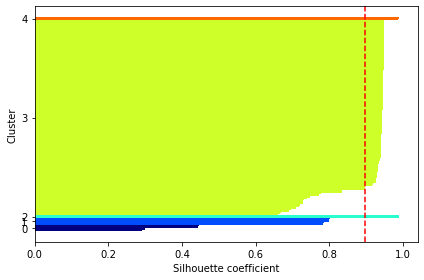

In [234]:
plot_silhouettes(DTtrans, clusters)

### Classification (KNN) using Clusters of PCA matrix

In [249]:
#Creating training and testing data
from sklearn import neighbors
from sklearn.model_selection import train_test_split

train, test, target_train, target_test = train_test_split(DTtrans, labels, test_size=.2, random_state=5)
print(test.shape)

(134, 10)


In [250]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')
knnclf.fit(train, target_train)

<ipython-input-250-2413ef3590fb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnclf.fit(train, target_train)


KNeighborsClassifier(weights='distance')

In [251]:
knnpreds_test = knnclf.predict(test)

In [252]:
print(classification_report(target_test, knnpreds_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00       123

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



In [253]:
print(knnclf.score(test, target_test))

1.0


In [254]:
print(knnclf.score(train, target_train))

1.0


Again, we are obtaining *perfect* accuracy on our classifier which is not what we want to see. Our model is extremely overfitting to the data and we need to further reduce our feature dimensions to fight the overfitting we continue to see.